# Given Parameters

**Camera Position**

Pos: $x = 500mm, y = 160mm, z =1140mm$

Rot: $ZY'X'' - roll: 100°, pitch=0°, yaw=90°$

**Intrinsic Parameters**

Res: $1280px \times 1080px$

Intr: $c_x = 636px, c_y = 548px, fx=241px, fy=238px$

**Projected Point**

$u=795px, v=467px$
$d=2.7m$


interactive(children=(FloatSlider(value=-0.5, description='x', max=10.0, min=-10.0, step=0.001), FloatSlider(v…

<function __main__.plot(x, y, z, roll, pitch, yaw)>

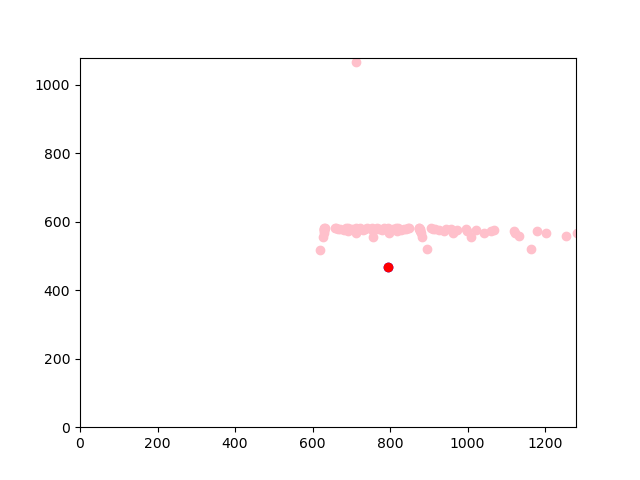

In [1]:
%matplotlib widget
import numpy as np
import numpy.linalg as lin
import scipy.spatial.transform as T
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Camera parameters
i_x = -0.500  # m
i_y = -0.160  # m
i_z = -1.140  # m

i_roll  = (-99.8) #deg
i_pitch = (0)  #deg
i_yaw   = (-90.9)  #deg

res_x = 1280 #px
res_y = 1080 #px

c_x = 636.0 #px
c_y = 548.0 #px
f_x = 241.0 #px
f_y = 238.0 #px

u = 795 #px
v = 467 #px
d = 2.7 #m


def extrinsic_matrix(x,y,z,roll,pitch,yaw):
    roll = np.radians(roll)
    pitch = np.radians(pitch)
    yaw = np.radians(yaw)

    quat_roll  = T.Rotation.from_quat([np.sin(roll / 2.0), 0,                   0              , np.cos(roll / 2.0)  ]) # X
    quat_pitch = T.Rotation.from_quat([0,                  np.sin(pitch / 2.0), 0              , np.cos(pitch / 2.0) ]) # Y
    quat_yaw   = T.Rotation.from_quat([0,                  0,                   np.sin(yaw/2.0), np.cos(yaw / 2.0)   ]) # Z      
    
    # Intrinsic Rotation z'y'x'' = ZYX
    rot = quat_roll * quat_pitch * quat_yaw
    rot = rot.as_matrix()

    translation = np.zeros((4,4))
    translation[:3, :3] = rot
    
    translation[0, 3] = y
    translation[1, 3] = z
    translation[2, 3] = x
    translation[3, 3] = 1

    return translation

def intrinsic_matrix():
    intrinsic = np.array([
        [f_x, 0,   c_x, 0],
        [0,   f_y, c_y, 0],
        [0,   0,   1,   0],
        [0,   0,   0,   1]
    ])
    
    return intrinsic
    

question = np.array([[u],[v],[1],[1]])
test_solution = np.array([[2.507], [1.509], [0.037], [1]])


o_points = []
for x in range(10):
    for y in range(10):
        o_points.append([[x * 4], [y * 4], [0.037], [1]])


fig, ax = plt.subplots(1, 1)

def plot(x,y,z,roll,pitch,yaw):
    intrinsic = intrinsic_matrix()
    extrinsic = extrinsic_matrix(x,y,z,roll,pitch,yaw)

    t_points = []
    x_points = []
    y_points = []

    for i in range(10 * 10):
        t_points.append(intrinsic @ extrinsic @ o_points[i])    
        x_points.append(t_points[i][0] / t_points[i][2])
        y_points.append(t_points[i][1] / t_points[i][2])

    
    test_solution_projected = intrinsic @ extrinsic @ test_solution
    test_solution_projected = test_solution_projected / test_solution_projected[2]


    proj = intrinsic @ extrinsic
    inv_proj = lin.inv(proj)

    unproj_question =  inv_proj @ question
    print("SOLUTION:")
    print(unproj_question * d)


    ax.clear()
    ax.set_xlim([0, res_x])
    ax.set_ylim([0, res_y])
    plt.plot(question[0], question[1], 'o', color = 'blue')
    plt.plot(test_solution_projected[0], test_solution_projected[1], 'o', color = 'red')
    plt.plot(x_points, y_points, 'o', color='pink')


x_slider = widgets.FloatSlider(min=-10, max=10, value=i_x, description='x', step=0.001)
y_slider = widgets.FloatSlider(min=-10, max=10, value=i_y, description='y', step=0.001)
z_slider = widgets.FloatSlider(min=-10, max=10, value=i_z, description='z', step=0.001)

roll_slider = widgets.FloatSlider(min=-360, max=360, value=i_roll, description='roll')
pitch_slider = widgets.FloatSlider(min=-360, max=360, value=i_pitch, description='pitch')
yaw_slider = widgets.FloatSlider(min=-360, max=360, value=i_yaw, description='yaw')


interact(plot, x=x_slider, y=y_slider, z=z_slider, roll=roll_slider, pitch = pitch_slider, yaw=yaw_slider)

## Resources
- https://www.mathworks.com/help/driving/ug/coordinate-systems.html
- https://danceswithcode.net/engineeringnotes/quaternions/quaternions.html
- https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html (scroll down)